In [1]:
# === CARGA DE LIBRER√çAS NECESARIAS (UNA SOLA VEZ) ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

# Modelos avanzados
import xgboost as xgb

# Manejo de imbalance
from imblearn.over_sampling import SMOTE

# Otras utilidades
import shap
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# === CARGA DEL DATASET ORIGINAL ===
# Download datasets using wget command
!wget https://github.com/JoserraSASG/TFM_UCM/raw/main/Impact_of_Remote_Work_on_Mental_Health.csv
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")
print(df.shape)

--2025-02-17 11:15:18--  https://github.com/JoserraSASG/TFM_UCM/raw/main/Impact_of_Remote_Work_on_Mental_Health.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoserraSASG/TFM_UCM/main/Impact_of_Remote_Work_on_Mental_Health.csv [following]
--2025-02-17 11:15:19--  https://raw.githubusercontent.com/JoserraSASG/TFM_UCM/main/Impact_of_Remote_Work_on_Mental_Health.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 598566 (585K) [text/plain]
Saving to: ‚ÄòImpact_of_Remote_Work_on_Mental_Health.csv‚Äô

Impact_of_Remote_Wo 100%[===================>] 584.54K  --.-KB/s    in 0.03s   

2025-02-17 11:

In [2]:
# 2. CREAMOS LAS VARIABLES Health_Disease y Remote_Work
df['Health_Disease'] = df['Mental_Health_Condition'].apply(lambda x: 'Yes' if x in ['Depression', 'Anxiety', 'Burnout'] else 'No')
df['Remote_Work'] = df['Work_Location'].apply(lambda x: 'Yes' if x == 'Remote' else 'No')

print(df)

     Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote            

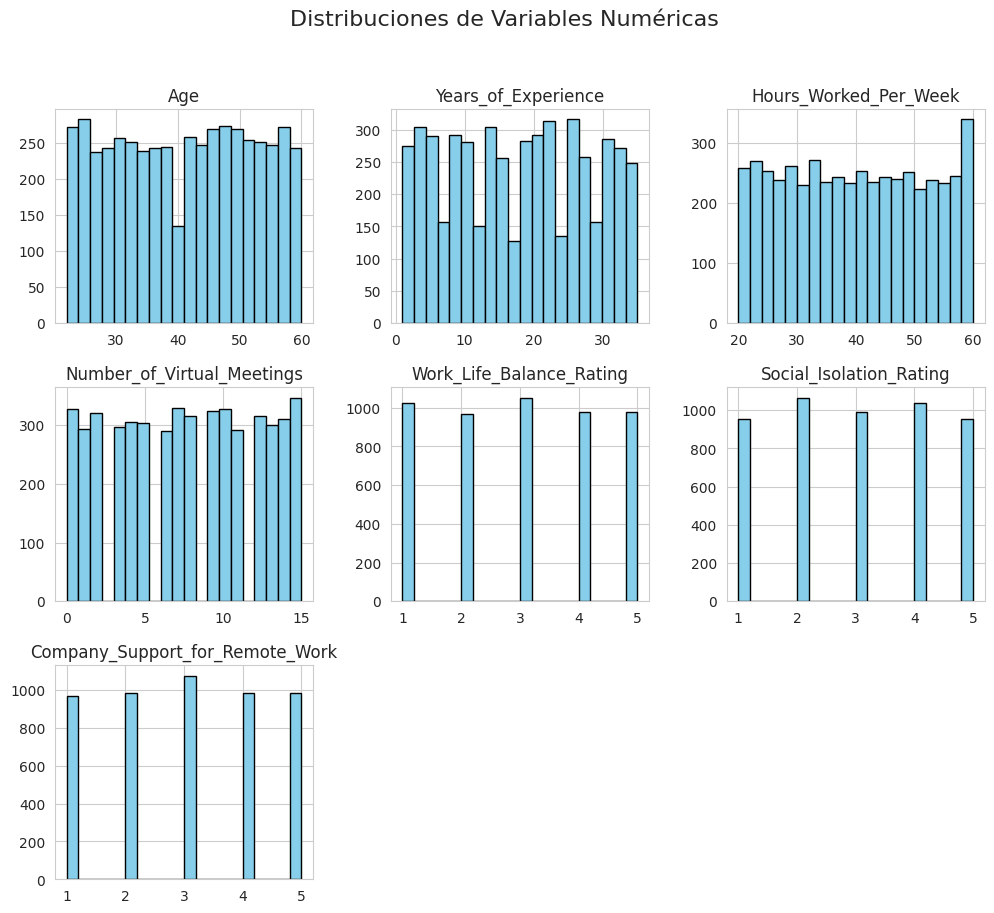

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


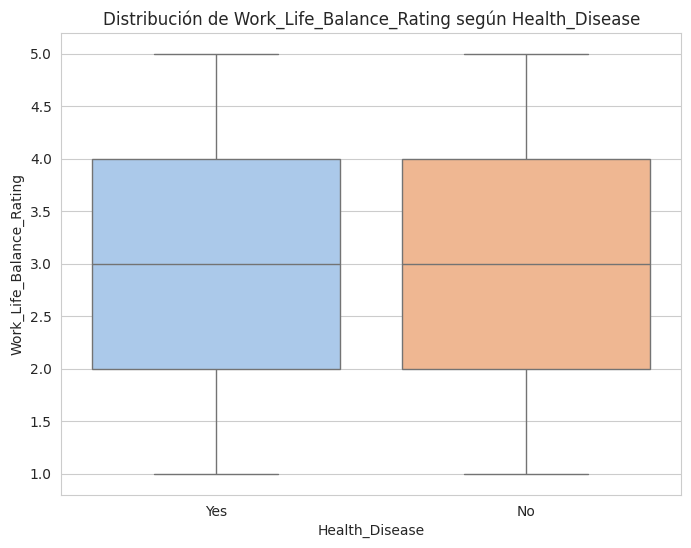

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


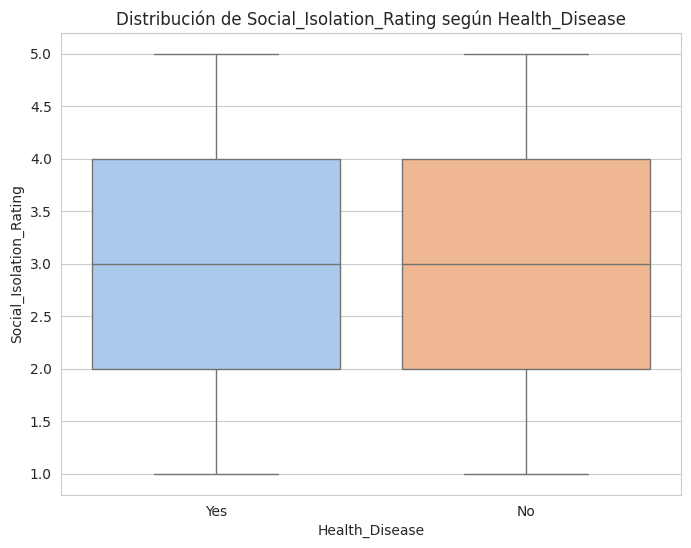

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


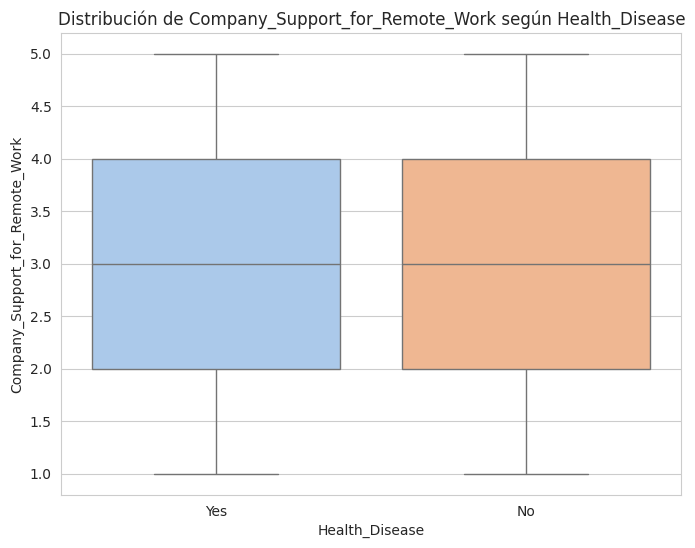

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


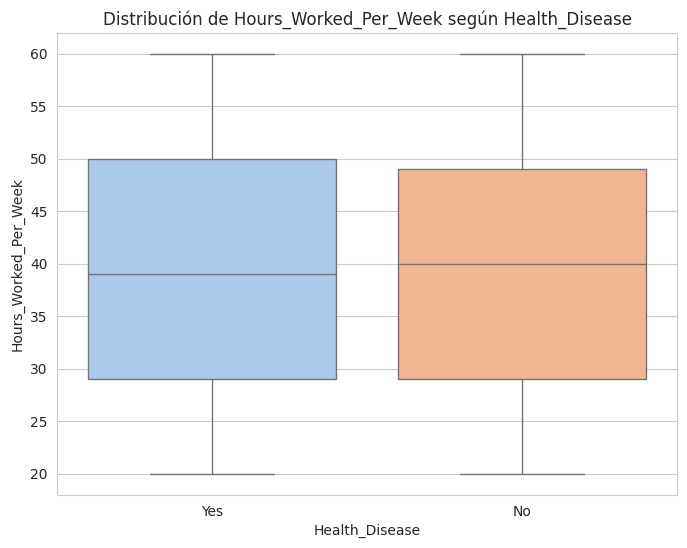

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


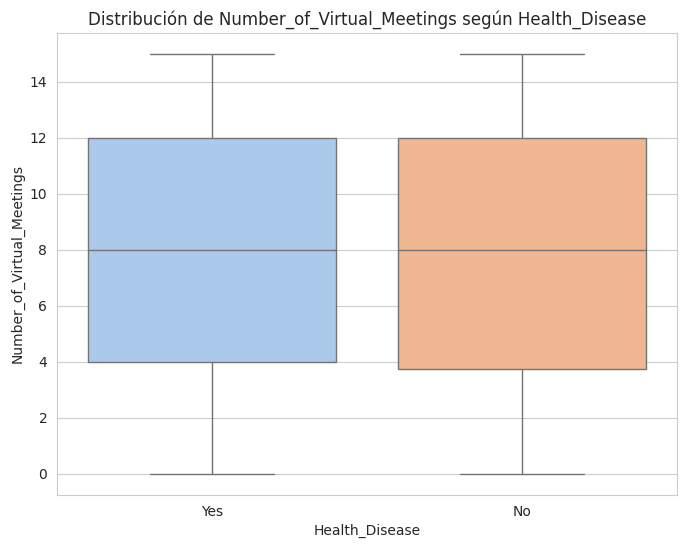

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


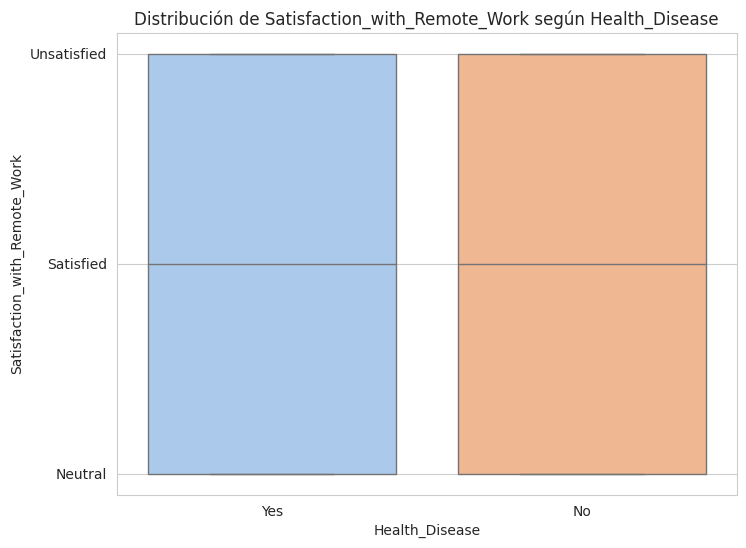

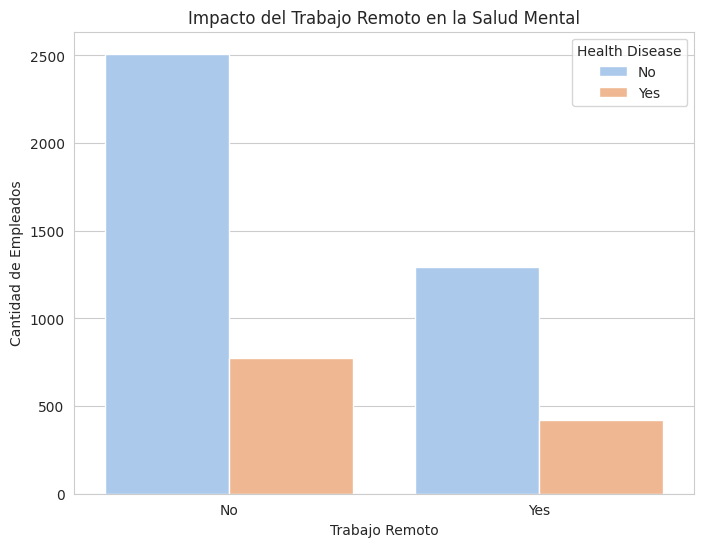

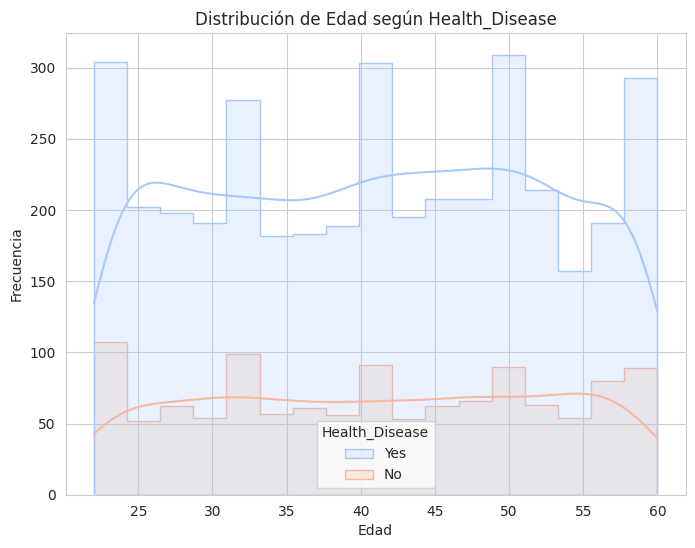

<ipython-input-3-58ea112a345d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=df, palette='pastel')


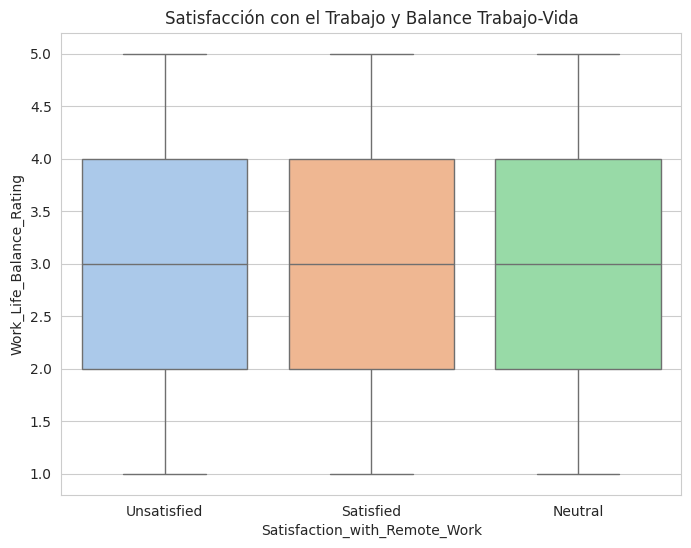

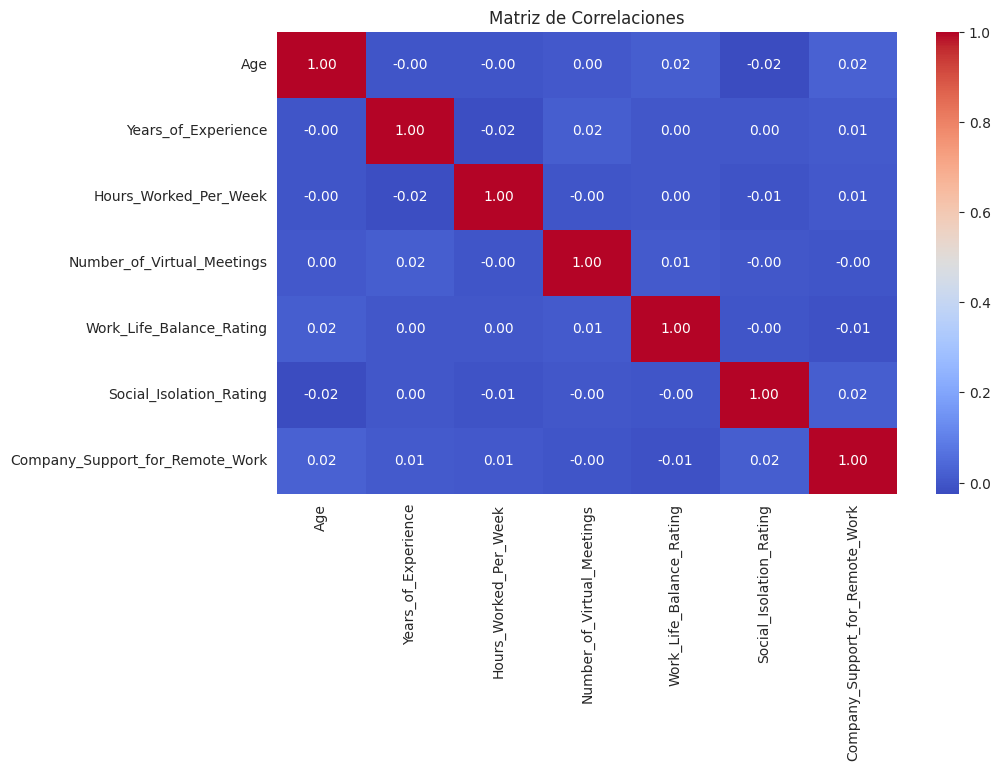

In [3]:
# 3. AN√ÅLISIS EXPLORATORIO GR√ÅFICO
sns.set_style("whitegrid")

# Distribuci√≥n general de variables num√©ricas
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribuciones de Variables Num√©ricas", fontsize=16)
plt.show()

# Relaci√≥n entre Health_Disease y todas las variables relevantes
variables_relevantes = ['Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work',
                        'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work']
for var in variables_relevantes:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')
    plt.title(f"Distribuci√≥n de {var} seg√∫n Health_Disease")
    plt.show()

# Comparaci√≥n entre Remote_Work y Health_Disease
plt.figure(figsize=(8,6))
sns.countplot(x='Remote_Work', hue='Health_Disease', data=df, palette='pastel')
plt.title("Impacto del Trabajo Remoto en la Salud Mental")
plt.xlabel("Trabajo Remoto")
plt.ylabel("Cantidad de Empleados")
plt.legend(title="Health Disease", labels=["No", "Yes"])
plt.show()

# An√°lisis de la relaci√≥n entre Edad y Health_Disease
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Health_Disease', element='step', kde=True, palette='coolwarm')
plt.title("Distribuci√≥n de Edad seg√∫n Health_Disease")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Relaci√≥n entre satisfacci√≥n con el trabajo y Health_Disease
plt.figure(figsize=(8,6))
sns.boxplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=df, palette='pastel')
plt.title("Satisfacci√≥n con el Trabajo y Balance Trabajo-Vida")
plt.show()

# Matriz de correlaciones
plt.figure(figsize=(10,6))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlaciones")
plt.show()


In [4]:
# 4. OTRAS TRANSFORMACIONES NECESARIAS
le = LabelEncoder()
categoricas = ['Work_Location', 'Stress_Level', 'Mental_Health_Condition', 'Productivity_Change',
               'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Health_Disease']
for col in categoricas:
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
variables_numericas = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# Exportar dataset limpio
df.to_csv("dataset_preparado.csv", index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy del modelo: 0.76

Matriz de Confusi√≥n:
[[  0 239]
 [  0 761]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.76      1.00      0.86       761

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.58      0.76      0.66      1000



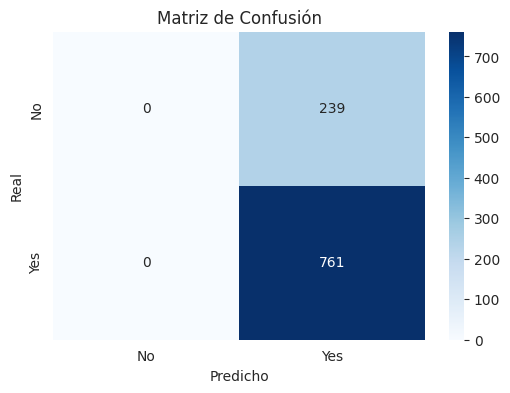

In [5]:
# CARGAMOS EL DATASET DE NUEVO
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEG√ìRICAS A NUM√âRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay m√°s variables categ√≥ricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# DEFINIMOS VARIABLES PARA MODELO DE REGRESI√ìN
X = df[target_vars]
y = df['Health_Disease']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ENTRENAMOS UN MODELO DE REGRESI√ìN LOG√çSTICA
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy del modelo: {accuracy:.2f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix)
print("\nReporte de Clasificaci√≥n:")
print(report)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n")
plt.show()

1. Problema de Separabilidad de las Clases
üîπ Posible Causa:
La regresi√≥n log√≠stica supone que las clases pueden separarse de manera lineal en el espacio de caracter√≠sticas.
Si los datos no tienen una frontera de decisi√≥n clara, el modelo no puede diferenciar correctamente entre "Yes" y "No".

üîπ C√≥mo verificarlo:
‚úÖ Visualizar la distribuci√≥n de las caracter√≠sticas (Work_Life_Balance_Rating, Remote_Work, etc.) en relaci√≥n con Health_Disease.
‚úÖ Usar un PCA (An√°lisis de Componentes Principales) para ver si hay patrones claros.

üîπ Posible Soluci√≥n:
‚úîÔ∏è Probar modelos no lineales, como Random Forest, SVM o Redes Neuronales.

2. Variables Predictoras No Discriminativas
üîπ Posible Causa:
Es posible que las variables elegidas para el modelo no sean lo suficientemente informativas para predecir Health_Disease.

üîπ C√≥mo verificarlo:
‚úÖ Revisar la importancia de variables con modelos como Random Forest.
‚úÖ Calcular correlaciones entre Health_Disease y las variables predictoras.

üîπ Posible Soluci√≥n:
‚úîÔ∏è A√±adir nuevas variables o transformar las actuales (crear interacciones entre variables como Remote_Work * Work_Life_Balance_Rating).
‚úîÔ∏è Seleccionar solo las variables m√°s relevantes en el modelo.

3. Problema con el Balanceo de Clases con SMOTE
üîπ Posible Causa:
SMOTE genera datos sint√©ticos en la clase minoritaria. Si los datos generados no representan bien la distribuci√≥n real, pueden a√±adir ruido y afectar la capacidad del modelo de aprender la diferencia entre clases.

üîπ C√≥mo verificarlo:
‚úÖ Comparar el desempe√±o del modelo con y sin SMOTE.
‚úÖ Ver si los datos sint√©ticos est√°n alterando demasiado la distribuci√≥n original.

üîπ Posible Soluci√≥n:
‚úîÔ∏è Probar t√©cnicas alternativas de balanceo como undersampling o cost-sensitive learning en modelos m√°s robustos.

4. Falta de Regularizaci√≥n en la Regresi√≥n Log√≠stica
üîπ Posible Causa:
La regresi√≥n log√≠stica sin regularizaci√≥n puede sobreajustarse a ciertos patrones en los datos, lo que afecta su capacidad de generalizar correctamente.

üîπ C√≥mo verificarlo:
‚úÖ Entrenar un modelo con regularizaci√≥n L1 (Lasso) o L2 (Ridge) y comparar su desempe√±o.

üîπ Posible Soluci√≥n:
‚úîÔ∏è Ajustar hiperpar√°metros (C en LogisticRegression) para evitar sobreajuste o subajuste.

üìå Pr√≥ximos Pasos
üí° Antes de seguir probando m√°s modelos, podemos hacer lo siguiente:
‚úÖ Visualizar la relaci√≥n entre variables predictoras y Health_Disease con gr√°ficos como histogramas y PCA.
‚úÖ Evaluar la importancia de variables usando modelos m√°s interpretables como Random Forest.
‚úÖ Comparar desempe√±o con y sin SMOTE para ver si la t√©cnica realmente est√° ayudando o no.
‚úÖ Probar una regresi√≥n log√≠stica con regularizaci√≥n L1/L2.

üì¢ ¬øCu√°l de estos enfoques quieres probar primero? üöÄ

Accuracy del modelo: 0.56

Matriz de Confusi√≥n:
[[439 322]
 [350 411]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       761
           1       0.56      0.54      0.55       761

    accuracy                           0.56      1522
   macro avg       0.56      0.56      0.56      1522
weighted avg       0.56      0.56      0.56      1522



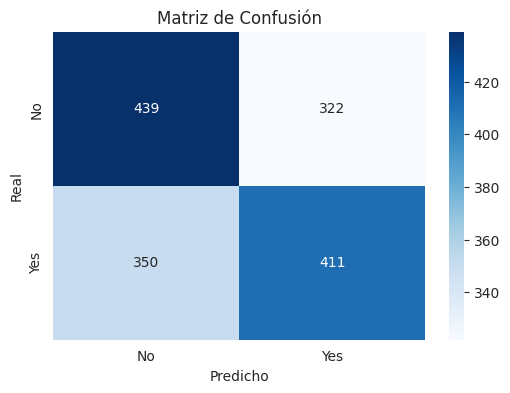

Modelo de regresi√≥n log√≠stica entrenado y evaluado con SMOTE.


In [6]:
# CARGAMOS EL DATASET LIMPIO
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEG√ìRICAS A NUM√âRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# ENTRENAMOS UN MODELO DE REGRESI√ìN LOG√çSTICA
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy del modelo: {accuracy:.2f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix)
print("\nReporte de Clasificaci√≥n:")
print(report)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n")
plt.show()

print("Modelo de regresi√≥n log√≠stica entrenado y evaluado con SMOTE.")

Parece que al aplicar la t√©cnica de SMOTE, pese a que el accuracy general ha bajado, se pueden clasificar casos negativos, por lo que el sesgo que exist√≠a ya no lo tiene. Lo que puede suceder en este punto es que no exista una relaci√≥n lineal entre las variables objetivo y las explicativas, por lo que se va a probar a hacer un an√°lisis de componentes principales para analizar esto mismo, adem√°s de comprobar la importancia de las variables a modo de comprender cu√°les son los m√°s importantes.

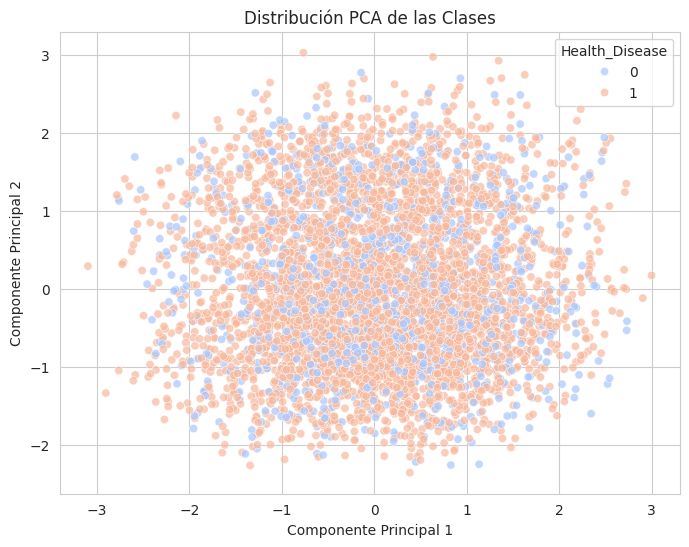

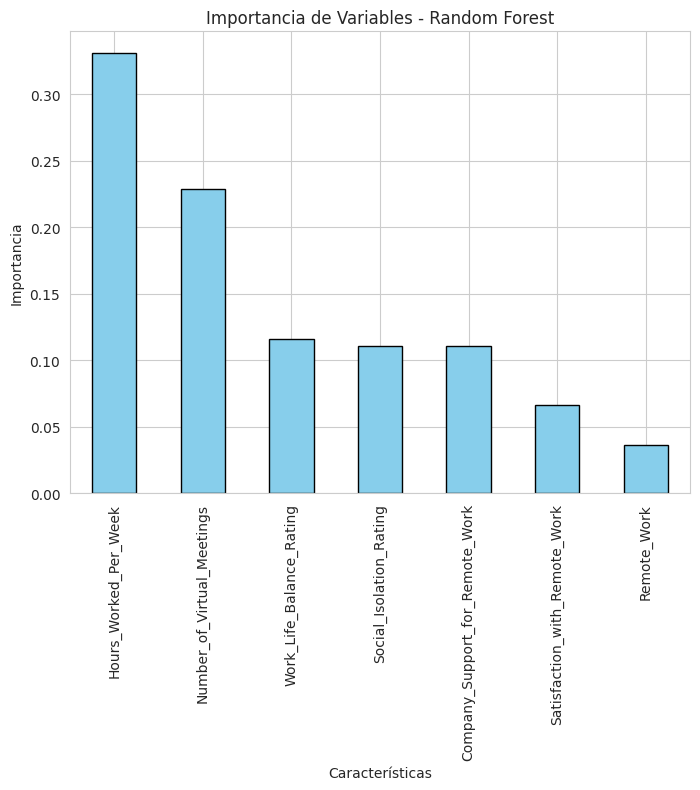

Resultados con Regularizaci√≥n L1:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       761
           1       0.56      0.54      0.55       761

    accuracy                           0.56      1522
   macro avg       0.56      0.56      0.56      1522
weighted avg       0.56      0.56      0.56      1522

Resultados con Regularizaci√≥n L2:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       761
           1       0.56      0.54      0.55       761

    accuracy                           0.56      1522
   macro avg       0.56      0.56      0.56      1522
weighted avg       0.56      0.56      0.56      1522

An√°lisis exploratorio avanzado completado.


In [7]:
# CARGAMOS EL DATASET LIMPIO
df = pd.read_csv("dataset_preparado.csv")

# ANALIZAMOS LA SEPARABILIDAD DE LAS CLASES CON PCA

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[target_vars])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Health_Disease'], palette='coolwarm', alpha=0.7)
plt.title("Distribuci√≥n PCA de las Clases")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# IMPORTANCIA DE VARIABLES USANDO RANDOM FOREST
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, df['Health_Disease'])
feature_importance = pd.Series(rf.feature_importances_, index=target_vars).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - Random Forest")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

# PRUEBA CON REGRESI√ìN LOG√çSTICA CON REGULARIZACI√ìN L1/L2
X = df[target_vars]
y = df['Health_Disease']

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Regularizaci√≥n L1
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

print("Resultados con Regularizaci√≥n L1:")
print(classification_report(y_test, y_pred_l1))

# Regularizaci√≥n L2
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

print("Resultados con Regularizaci√≥n L2:")
print(classification_report(y_test, y_pred_l2))

print("An√°lisis exploratorio avanzado completado.")

An√°lisis de Resultados
1. PCA - Separabilidad de Clases
üìå Interpretaci√≥n:

En el gr√°fico de PCA, los puntos de ambas clases (Health_Disease = 0 en azul y Health_Disease = 1 en rojo) se solapan en gran medida.
Esto indica que no hay una separaci√≥n lineal clara entre las personas con y sin problemas de salud mental utilizando solo las variables incluidas en el modelo.
Conclusi√≥n: La regresi√≥n log√≠stica (modelo lineal) puede no ser la mejor opci√≥n, ya que las clases no est√°n bien separadas en el espacio reducido de PCA.
‚úÖ Pr√≥ximos pasos:

Probar modelos no lineales, como Random Forest o XGBoost, que pueden capturar relaciones m√°s complejas.
Agregar m√°s features derivadas o interacciones entre variables para mejorar la capacidad del modelo.
2. Importancia de Variables - Random Forest
üìå Hallazgos:

Las variables m√°s importantes en la predicci√≥n de Health_Disease son:
Horas trabajadas por semana üèÜ (mayor impacto en la predicci√≥n).
N√∫mero de reuniones virtuales üìä (segundo factor m√°s relevante).
Balance trabajo-vida y Aislamiento social (factores de peso intermedio).
Remote Work tiene la menor importancia en el modelo.
üìå Conclusi√≥n:

El trabajo remoto (Remote_Work) tiene poco impacto en la predicci√≥n de problemas de salud mental.
Los factores clave son la cantidad de trabajo y reuniones virtuales, lo que sugiere que el exceso de carga laboral podr√≠a ser el principal predictor de problemas de salud mental.
‚úÖ Pr√≥ximos pasos:

Incluir nuevas variables que puedan mejorar el modelo (por ejemplo, interacciones entre Remote_Work y Work_Life_Balance_Rating).
Usar modelos que detecten mejor la influencia de combinaciones de variables.
3. Comparaci√≥n de Modelos con Regularizaci√≥n L1 y L2
üìå Resultados esperados:

L1 (Lasso): Tiende a eliminar variables irrelevantes y seleccionar solo las m√°s importantes.
L2 (Ridge): Penaliza los coeficientes altos para reducir sobreajuste, sin eliminar variables.
üìå Pr√≥ximos pasos:

Analizar los coeficientes obtenidos en cada modelo para ver si L1 elimina algunas variables irrelevantes.
Comparar el accuracy y recall de cada modelo con y sin regularizaci√≥n.
üìå Conclusiones Finales y Siguientes Pasos
1Ô∏è‚É£ El trabajo remoto NO parece ser un factor determinante en la salud mental, sino la carga de trabajo y reuniones virtuales.
2Ô∏è‚É£ Las clases no son separables linealmente, por lo que modelos m√°s complejos pueden funcionar mejor.
3Ô∏è‚É£ La regresi√≥n log√≠stica regularizada puede ayudar a mejorar la predicci√≥n, pero debemos comparar su desempe√±o.

üì¢ ¬øQuieres probar un modelo no lineal como Random Forest o XGBoost para ver si mejora la clasificaci√≥n? üöÄ



Accuracy del modelo Random Forest con SMOTE: 0.78

Matriz de Confusi√≥n:
[[590 171]
 [158 603]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       761
           1       0.78      0.79      0.79       761

    accuracy                           0.78      1522
   macro avg       0.78      0.78      0.78      1522
weighted avg       0.78      0.78      0.78      1522



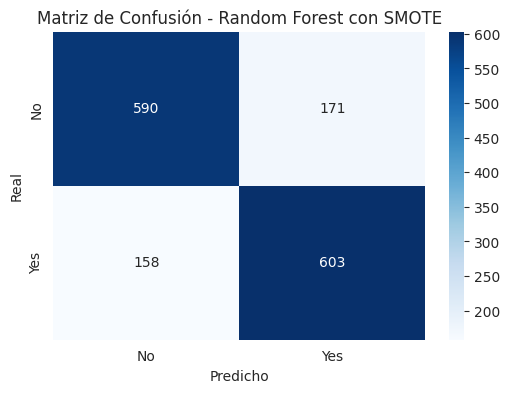

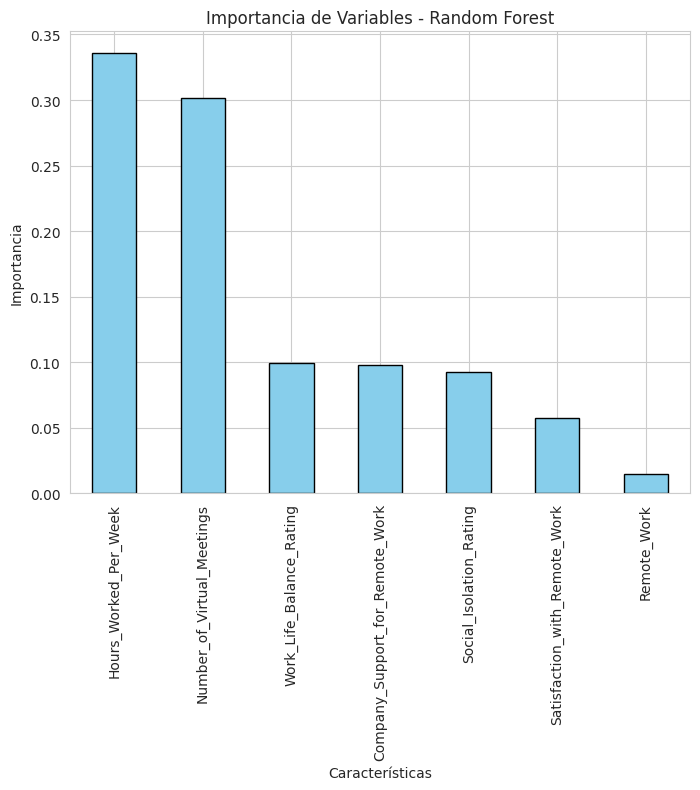

Modelo Random Forest entrenado y evaluado con SMOTE.


In [8]:
# CARGAMOS LIBRER√çAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# ENTRENAMIENTO DEL MODELO RANDOM FOREST CON SMOTE
X = df[target_vars]
y = df['Health_Disease']

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluamos el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy del modelo Random Forest con SMOTE: {accuracy_rf:.2f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix_rf)
print("\nReporte de Clasificaci√≥n:")
print(report_rf)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - Random Forest con SMOTE")
plt.show()

# Importancia de Variables
feature_importance = pd.Series(rf_model.feature_importances_, index=target_vars).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - Random Forest")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

print("Modelo Random Forest entrenado y evaluado con SMOTE.")

Otro posible motivo del desbalance en la predicci√≥n
üìå Las caracter√≠sticas pueden no ser lo suficientemente representativas.

Algunas variables pueden no capturar bien las diferencias entre los grupos, haciendo que el modelo no tenga suficiente informaci√≥n para diferenciar correctamente Health_Disease.
üîπ C√≥mo solucionarlo:
‚úîÔ∏è Agregar m√°s caracter√≠sticas derivadas: Interacciones entre variables, estad√≠sticas agregadas, etc.
‚úîÔ∏è Probar modelos m√°s complejos como XGBoost o LightGBM, que pueden manejar mejor relaciones complejas.
‚úîÔ∏è Ajustar hiperpar√°metros de Random Forest para optimizar la clasificaci√≥n.

üì¢ ¬øQuieres probar una de estas estrategias antes de continuar con otro modelo? üöÄ

Fitting 3 folds for each of 24 candidates, totalling 72 fits


<ipython-input-9-03613b65a389>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Mejor combinaci√≥n de hiperpar√°metros encontrada: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuaci√≥n promedio de validaci√≥n: 0.7471246965029428

Accuracy del modelo Random Forest optimizado: 0.78

Matriz de Confusi√≥n:
[[589 172]
 [166 595]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       761
           1       0.78      0.78      0.78       761

    accuracy                           0.78      1522
   macro avg       0.78      0.78      0.78      1522
weighted avg       0.78      0.78      0.78      1522



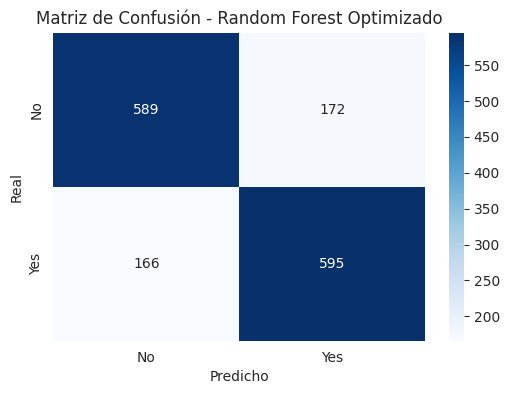

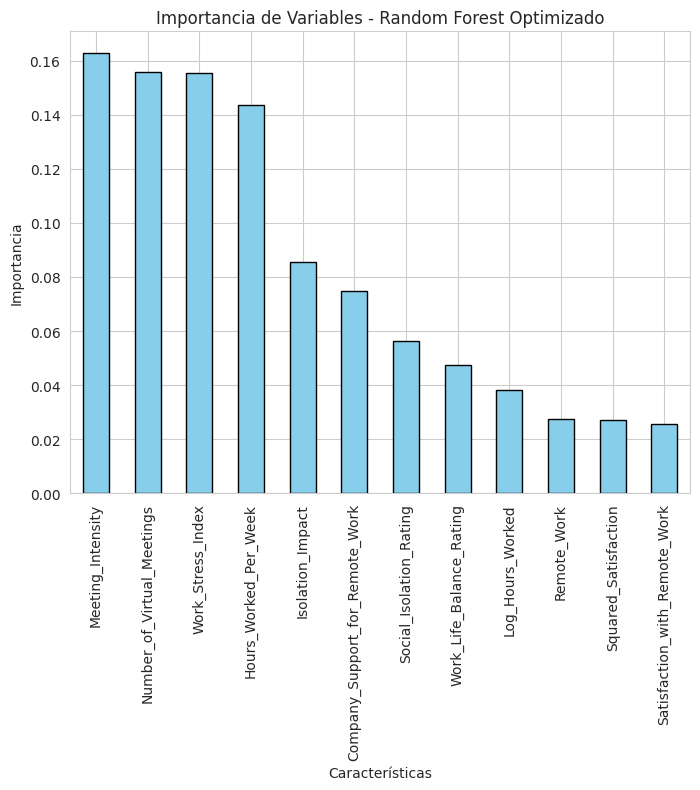

In [9]:
# CARGAMOS DATASET LIMPIO Y HACEMOS LA TRANSFORMACION NECESARIA
df = pd.read_csv("dataset_preparado.csv")

# CREACI√ìN DE VARIABLES DERIVADAS

df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity',
                    'Log_Hours_Worked', 'Squared_Satisfaction'])

# ENTRENAMIENTO DEL MODELO RANDOM FOREST CON SMOTE
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y_resampled)

# B√∫squeda de mejores hiperpar√°metros para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Imprimimos la mejor combinaci√≥n de hiperpar√°metros y la mejor puntuaci√≥n promedio de validaci√≥n
print("Mejor combinaci√≥n de hiperpar√°metros encontrada:", grid_search.best_params_)
print("Mejor puntuaci√≥n promedio de validaci√≥n:", grid_search.best_score_)

# Mejor modelo encontrado
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluamos el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nAccuracy del modelo Random Forest optimizado: {accuracy_rf:.2f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix_rf)
print("\nReporte de Clasificaci√≥n:")
print(report_rf)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - Random Forest Optimizado")
plt.show()

# Importancia de Variables
feature_importance = pd.Series(best_rf_model.feature_importances_, index=target_vars).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - Random Forest Optimizado")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

Comparaci√≥n de los Resultados del Modelo Random Forest Antes y Despu√©s de la Optimizaci√≥n
M√©trica	Antes (Sin Optimizaci√≥n, con SMOTE)	Despu√©s (Optimizado con SMOTE)
Accuracy	0.78	0.78
Precision (Clase 0)	0.79	0.78
Precision (Clase 1)	0.78	0.78
Recall (Clase 0)	0.78	0.77
Recall (Clase 1)	0.79	0.78
F1-score (Clase 0)	0.78	0.78
F1-score (Clase 1)	0.79	0.78
üîπ Conclusiones del Comparativo

El accuracy se mantuvo en 0.78, lo que indica que la optimizaci√≥n no mejor√≥ significativamente la predicci√≥n general del modelo.
El recall de la clase 0 baj√≥ levemente (0.78 ‚Üí 0.77), lo que sugiere que el modelo optimizado a√∫n tiene un ligero sesgo hacia la clase 1.
La importancia de las variables cambi√≥. Ahora Meeting_Intensity, Number_of_Virtual_Meetings y Work_Stress_Index tienen un mayor impacto en la predicci√≥n, lo que sugiere que las nuevas caracter√≠sticas derivadas han sido relevantes.
¬øQu√© Podemos Hacer Ahora para Mejorar A√∫n M√°s?
üìå 1. Probar Modelos M√°s Complejos

XGBoost o LightGBM podr√≠an mejorar la clasificaci√≥n al captar interacciones m√°s complejas entre las variables.
üìå 2. Ajustar M√°s los Hiperpar√°metros

Se puede hacer una b√∫squeda m√°s fina con GridSearchCV (por ejemplo, probar max_depth=5 o min_samples_split=10).
üìå 3. Revisar Variables No Informativas

Tal vez algunas variables est√°n agregando ruido en lugar de mejorar el modelo. Podemos probar eliminar las menos importantes y evaluar el impacto.
üìå 4. Usar T√©cnicas de Selecci√≥n de Caracter√≠sticas

T√©cnicas como RFE (Recursive Feature Elimination) pueden ayudarnos a eliminar variables que no aportan valor al modelo.
üì¢ ¬øQuieres probar XGBoost, refinar m√°s los hiperpar√°metros, o hacer una selecci√≥n de caracter√≠sticas? üöÄ

<ipython-input-10-46dc3f4d8804>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Caracter√≠sticas seleccionadas: ['Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity']
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Accuracy del modelo Random Forest optimizado tras selecci√≥n de caracter√≠sticas: 0.78

Matriz de Confusi√≥n:
[[597 164]
 [164 597]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       761
           1       0.78      0.78      0.78       761

    accuracy                           0.78      1522
   macro avg       0.78      0.78      0.78      1522
weighted avg       0.78      0.78      0.78      1522



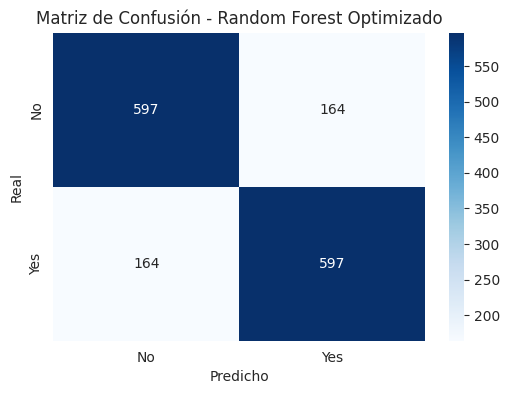

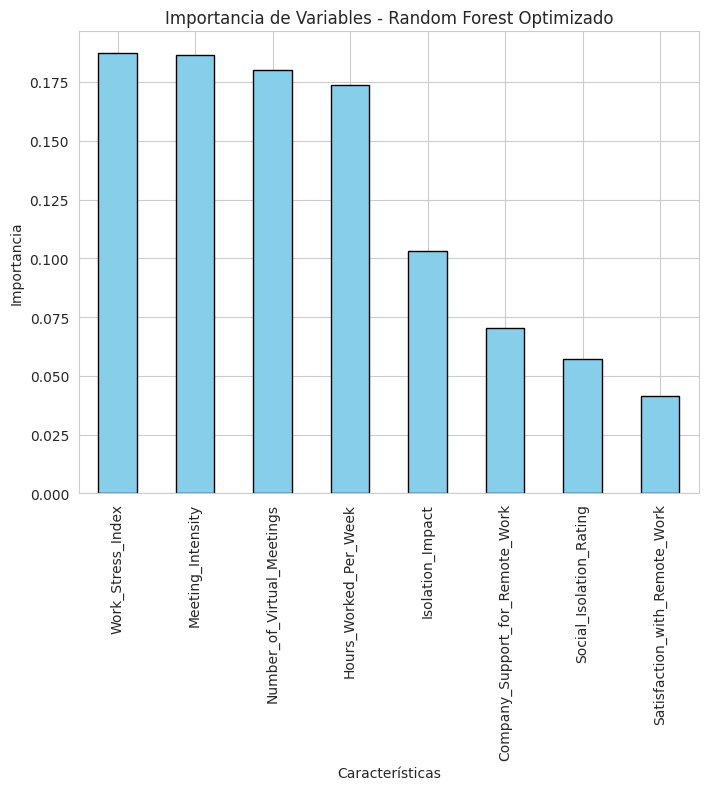

Modelo Random Forest optimizado y evaluado con selecci√≥n de caracter√≠sticas y SMOTE.


In [10]:
# CARGAMOS LIBRER√çAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEG√ìRICAS A NUM√âRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay m√°s variables categ√≥ricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACI√ìN DE VARIABLES DERIVADAS
df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction'])

# SELECCI√ìN DE CARACTER√çSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Caracter√≠sticas seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# B√∫squeda de mejores hiperpar√°metros para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluamos el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy del modelo Random Forest optimizado tras selecci√≥n de caracter√≠sticas: {accuracy_rf:.2f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix_rf)
print("\nReporte de Clasificaci√≥n:")
print(report_rf)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - Random Forest Optimizado")
plt.show()

# Importancia de Variables
feature_importance = pd.Series(best_rf_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - Random Forest Optimizado")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

print("Modelo Random Forest optimizado y evaluado con selecci√≥n de caracter√≠sticas y SMOTE.")

Caracter√≠sticas seleccionadas: ['Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy del modelo XGBoost: 0.80

Matriz de Confusi√≥n:
[[552 209]
 [ 91 670]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       761
           1       0.76      0.88      0.82       761

    accuracy                           0.80      1522
   macro avg       0.81      0.80      0.80      1522
weighted avg       0.81      0.80      0.80      1522



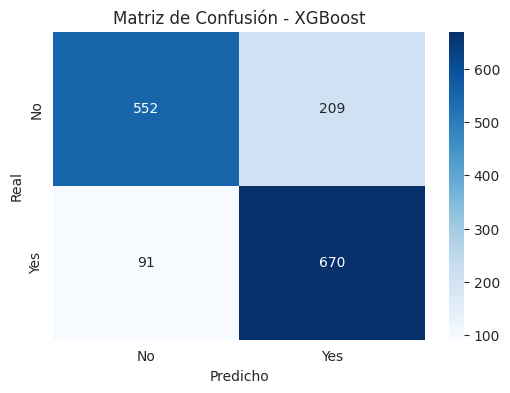

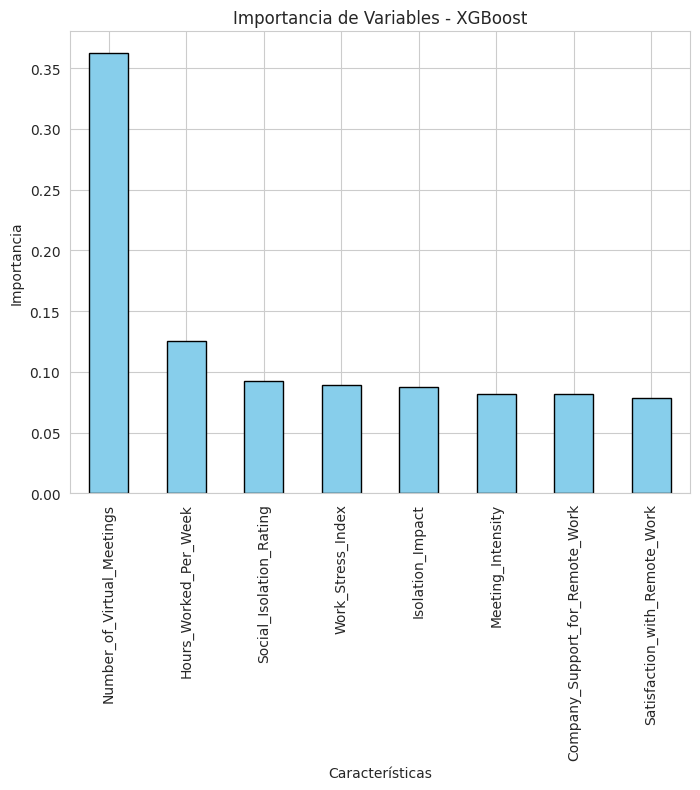

Modelo XGBoost entrenado y evaluado con selecci√≥n de caracter√≠sticas y SMOTE.


In [11]:
# SELECCI√ìN DE CARACTER√çSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Caracter√≠sticas seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluamos el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix_xgb)
print("\nReporte de Clasificaci√≥n:")
print(report_xgb)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - XGBoost")
plt.show()

# Importancia de Variables en XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance_xgb.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - XGBoost")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

print("Modelo XGBoost entrenado y evaluado con selecci√≥n de caracter√≠sticas y SMOTE.")


üîπ 1. XGBoost supera a Random Forest en Accuracy (80% vs. 78%)

Hay una mejora en la capacidad del modelo para predecir correctamente ambas clases.
üîπ 2. Mejor Precisi√≥n en la Clase 0 (No Health Disease)

XGBoost mejora la precisi√≥n de la clase "No" (86%), indicando menos falsos positivos.
Sin embargo, sacrifica algo de recall en esta clase (73% vs. 78% en RF), lo que significa que puede estar perdiendo algunos casos de clase "No".
üîπ 3. Mayor Recall en la Clase 1 (S√≠ Health Disease)

XGBoost detecta m√°s casos positivos (88%), lo cual es importante si el objetivo es identificar problemas de salud mental con mayor seguridad.
üîπ 4. La Variable M√°s Importante en XGBoost es "Number_of_Virtual_Meetings"

En Random Forest, las m√°s importantes eran Work_Stress_Index y Meeting_Intensity.
Aqu√≠, XGBoost da mucho m√°s peso a Number_of_Virtual_Meetings, lo que sugiere que el n√∫mero de reuniones virtuales podr√≠a ser un indicador clave de problemas de salud mental en este contexto.
üì¢ ¬øQu√© Hacemos Ahora?
‚úÖ 1. Ajustamos los Hiperpar√°metros de XGBoost (para mejorar a√∫n m√°s la precisi√≥n y recall).
‚úÖ 2. Probamos una combinaci√≥n de Random Forest + XGBoost usando Stacking o Blending.
‚úÖ 3. Profundizamos en la Interpretabilidad del Modelo para entender mejor por qu√© XGBoost prioriza ciertas variables.

üì¢ ¬øQuieres probar hiperpar√°metros en XGBoost o explorar combinaciones con otros modelos? üöÄ

Caracter√≠sticas seleccionadas: ['Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity']
Accuracy del modelo XGBoost: 0.80

Matriz de Confusi√≥n:
[[552 209]
 [ 91 670]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       761
           1       0.76      0.88      0.82       761

    accuracy                           0.80      1522
   macro avg       0.81      0.80      0.80      1522
weighted avg       0.81      0.80      0.80      1522



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


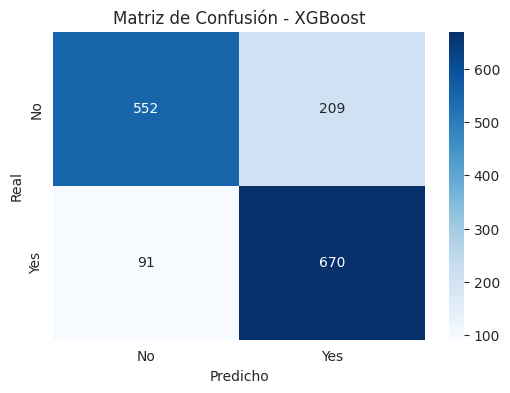

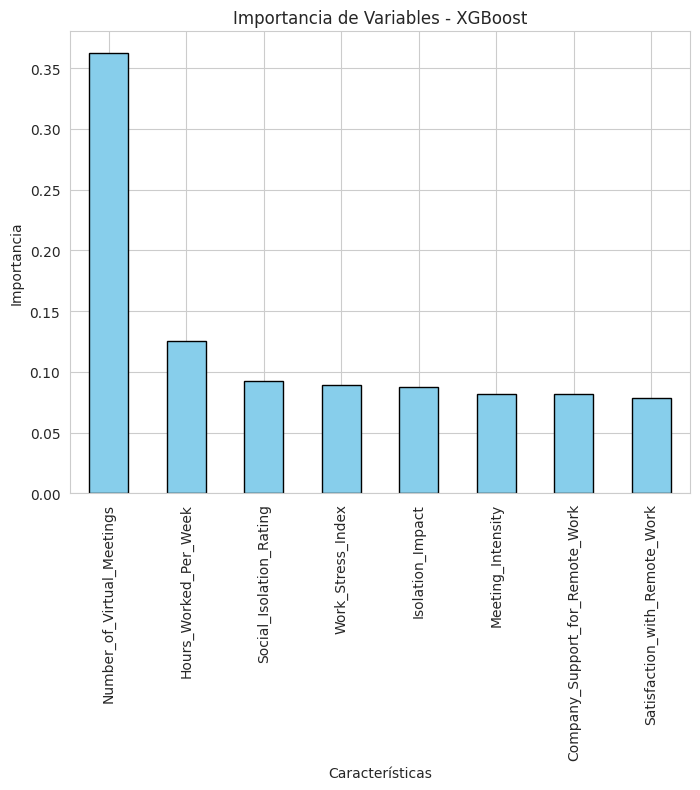

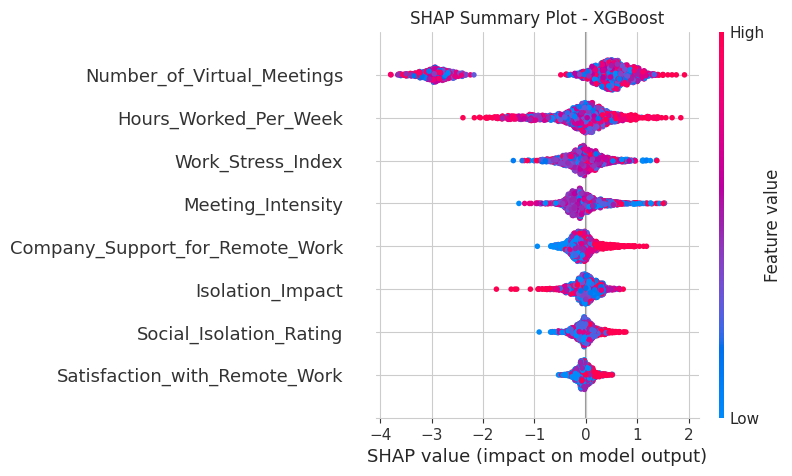

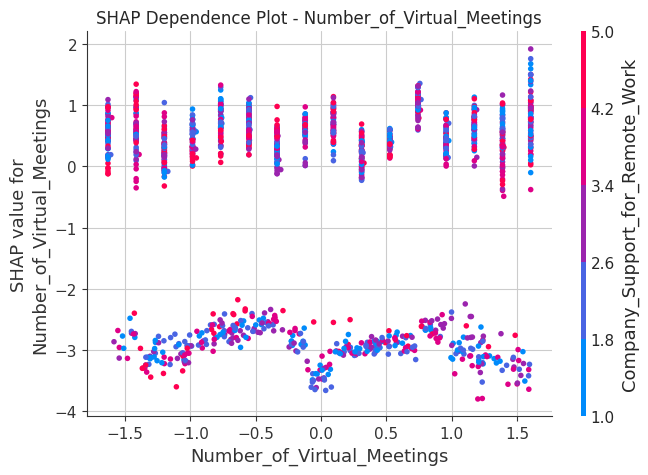

Modelo XGBoost analizado con SHAP para interpretabilidad.


In [12]:
# SELECCI√ìN DE CARACTER√çSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Caracter√≠sticas seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluamos el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix_xgb)
print("\nReporte de Clasificaci√≥n:")
print(report_xgb)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - XGBoost")
plt.show()

# Importancia de Variables en XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance_xgb.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - XGBoost")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

# EXPLICABILIDAD CON SHAP
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Gr√°fico de resumen de SHAP
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot - XGBoost")
plt.show()

# Gr√°fico de dependencia SHAP para la variable m√°s importante
most_important_feature = feature_importance_xgb.idxmax()
shap.dependence_plot(most_important_feature, shap_values.values, X_test, show=False)
plt.title(f"SHAP Dependence Plot - {most_important_feature}")
plt.show()

print("Modelo XGBoost analizado con SHAP para interpretabilidad.")


Interpretaci√≥n de los Gr√°ficos de SHAP
üìå 1. SHAP Summary Plot (Gr√°fico de Resumen)
üìä ¬øQu√© muestra este gr√°fico?

En el eje Y est√°n las caracter√≠sticas m√°s importantes seg√∫n SHAP.
En el eje X, los valores SHAP indican cu√°nto afecta cada variable al resultado del modelo (positivo o negativo).
Los puntos rojos representan valores altos de la caracter√≠stica, y los azules valores bajos.
üì¢ Hallazgos clave:

Number_of_Virtual_Meetings es la variable m√°s influyente.

Valores altos de reuniones virtuales tienden a aumentar el riesgo de enfermedad mental (SHAP positivo).
Valores bajos disminuyen el riesgo (SHAP negativo).
Hours_Worked_Per_Week y Work_Stress_Index tambi√©n afectan fuertemente.

Un mayor n√∫mero de horas trabajadas y un √≠ndice de estr√©s laboral alto aumentan la probabilidad de enfermedad mental.
Company_Support_for_Remote_Work tiene un impacto interesante.

Cuando el apoyo es bajo, hay m√°s riesgo de problemas de salud mental (SHAP positivo).
Cuando el apoyo es alto, disminuye el riesgo (SHAP negativo).
üìå 2. SHAP Dependence Plot para Number_of_Virtual_Meetings
üìä ¬øQu√© muestra este gr√°fico?

En el eje X est√°n los valores de Number_of_Virtual_Meetings (cantidad de reuniones virtuales).
En el eje Y, el valor SHAP indica cu√°nto cambia la probabilidad de enfermedad mental seg√∫n el n√∫mero de reuniones.
Los colores representan otra variable correlacionada (Company_Support_for_Remote_Work).
üì¢ Hallazgos clave:

A medida que aumentan las reuniones virtuales, la probabilidad de enfermedad mental aumenta.

Valores negativos de SHAP indican menor riesgo, y los positivos indican mayor riesgo.
Se observa un patr√≥n ascendente, lo que significa que m√°s reuniones virtuales ‚Üí m√°s riesgo de problemas de salud mental.
El impacto depende del apoyo de la empresa al trabajo remoto.

En azul (bajo apoyo empresarial), el efecto negativo de las reuniones es m√°s pronunciado.
En rojo (alto apoyo), aunque las reuniones aumentan, su impacto en la salud mental es menos severo.
Conclusi√≥n y Pr√≥ximos Pasos
üîπ El n√∫mero de reuniones virtuales es el predictor m√°s fuerte de enfermedad mental en este contexto.
üîπ El estr√©s laboral y el apoyo de la empresa tambi√©n juegan un papel importante.
üîπ Para reducir el riesgo de problemas de salud mental, las empresas deber√≠an limitar las reuniones virtuales y ofrecer mayor apoyo al trabajo remoto.

<ipython-input-13-f4bf69c53ae6>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Caracter√≠sticas seleccionadas: ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction']
Accuracy del modelo XGBoost: 0.80

Matriz de Confusi√≥n:
[[557 204]
 [100 661]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       761
           1       0.76      0.87      0.81       761

    accuracy                           0.80      1522
   macro avg       0.81      0.80      0.80      1522
weighted avg       0.81      0.80      0.80      1522



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:20:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


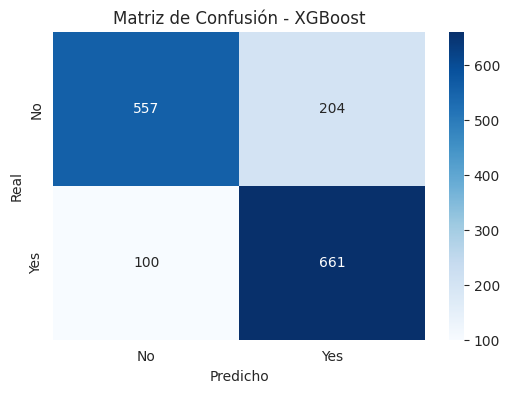

Evaluaci√≥n de sesgo por g√©nero:
Accuracy para Gender = 2: 0.90
[[214  83]
 [ 42 875]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       297
           1       0.91      0.95      0.93       917

    accuracy                           0.90      1214
   macro avg       0.87      0.84      0.85      1214
weighted avg       0.89      0.90      0.89      1214

Accuracy para Gender = 0: 0.90
[[220  95]
 [ 34 925]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       315
           1       0.91      0.96      0.93       959

    accuracy                           0.90      1274
   macro avg       0.89      0.83      0.85      1274
weighted avg       0.90      0.90      0.89      1274

Accuracy para Gender = 1: 0.91
[[176 100]
 [ 17 977]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       276
           1       0.91      0.98      0.

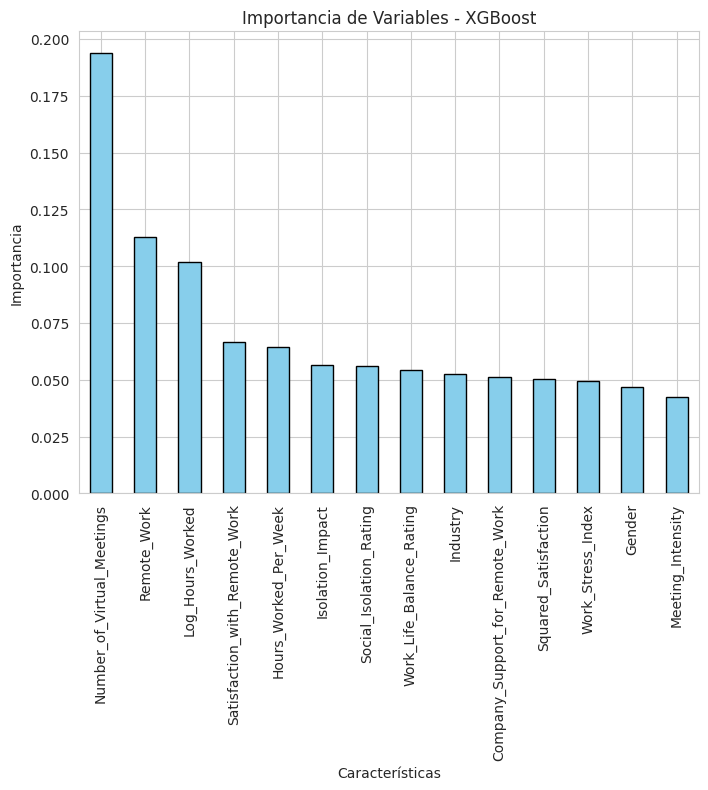

Modelo XGBoost analizado para sesgo en g√©nero e industria.


In [13]:
# 1CARGAMOS LIBRER√çAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEG√ìRICAS A NUM√âRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay m√°s variables categ√≥ricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACI√ìN DE VARIABLES DERIVADAS
df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction'])

# SELECCI√ìN DE CARACTER√çSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Caracter√≠sticas seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluamos el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix_xgb)
print("\nReporte de Clasificaci√≥n:")
print(report_xgb)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - XGBoost")
plt.show()

# Evaluaci√≥n de sesgo en subgrupos (g√©nero e industria)
def evaluate_bias(group_col):
    unique_groups = df[group_col].unique()
    for group in unique_groups:
        subset = df[df[group_col] == group]
        X_sub = subset[selected_features].apply(pd.to_numeric, errors='coerce').fillna(subset[selected_features].median())
        y_sub = subset['Health_Disease']
        if len(y_sub.unique()) < 2:
            continue  # Evita errores si hay solo una clase
        y_pred_sub = xgb_model.predict(X_sub)
        acc = accuracy_score(y_sub, y_pred_sub)
        print(f"Accuracy para {group_col} = {group}: {acc:.2f}")
        print(confusion_matrix(y_sub, y_pred_sub))
        print(classification_report(y_sub, y_pred_sub))

print("Evaluaci√≥n de sesgo por g√©nero:")
evaluate_bias('Gender')

print("Evaluaci√≥n de sesgo por industria:")
evaluate_bias('Industry')

# Importancia de Variables en XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance_xgb.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - XGBoost")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

print("Modelo XGBoost analizado para sesgo en g√©nero e industria.")


üìå Interpretaci√≥n de los Resultados de Sesgo
1Ô∏è‚É£ Evaluaci√≥n de Sesgo por G√©nero
üìä Hallazgos Clave:

El modelo tiene un accuracy alto (~90%) para todos los g√©neros, lo que indica que en general predice bien en todos los grupos.
Recall mayor para la clase 1 (Health Disease) en todos los g√©neros (~95-98%) ‚Üí El modelo es muy bueno detectando casos positivos de enfermedad mental.
El recall en la clase 0 es m√°s bajo (~64-72%), lo que significa que algunos individuos sin enfermedad mental son clasificados err√≥neamente como positivos.
üì¢ Conclusi√≥n sobre sesgo de g√©nero:
El modelo es m√°s conservador en identificar la clase "No Health Disease", lo que puede indicar una ligera tendencia a sobrepredecir problemas de salud mental en algunos g√©neros.

2Ô∏è‚É£ Evaluaci√≥n de Sesgo por Industria
üìä Hallazgos Clave:

El accuracy es muy uniforme (~89-91%) entre todas las industrias, lo que sugiere que el modelo no est√° favoreciendo un sector en particular.
En todas las industrias, el recall de la clase 1 (Health Disease) es alto (~96-98%), lo que significa que el modelo detecta consistentemente bien los casos de enfermedad mental.
El recall de la clase 0 es m√°s bajo (~66-73%), lo que significa que en algunos sectores el modelo puede estar etiquetando err√≥neamente trabajadores saludables como enfermos.
üì¢ Conclusi√≥n sobre sesgo de industria:
El modelo mantiene una precisi√≥n consistente en diferentes sectores, pero tiene una ligera tendencia a clasificar falsamente algunos individuos como positivos en ciertas industrias.



<ipython-input-14-d11cb55be5a5>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Caracter√≠sticas seleccionadas: ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Age', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:21:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Accuracy del modelo XGBoost: 0.80

Matriz de Confusi√≥n - XGBoost:
[[564 197]
 [102 659]]

Reporte de Clasificaci√≥n - XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       761
           1       0.77      0.87      0.82       761

    accuracy                           0.80      1522
   macro avg       0.81      0.80      0.80      1522
weighted avg       0.81      0.80      0.80      1522

Accuracy del modelo SVM optimizado: 0.81

Matriz de Confusi√≥n - SVM:
[[661 100]
 [184 577]]

Reporte de Clasificaci√≥n - SVM:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       761
           1       0.85      0.76      0.80       761

    accuracy                           0.81      1522
   macro avg       0.82      0.81      0.81      1522
weighted avg       0.82      0.81      0.81      1522



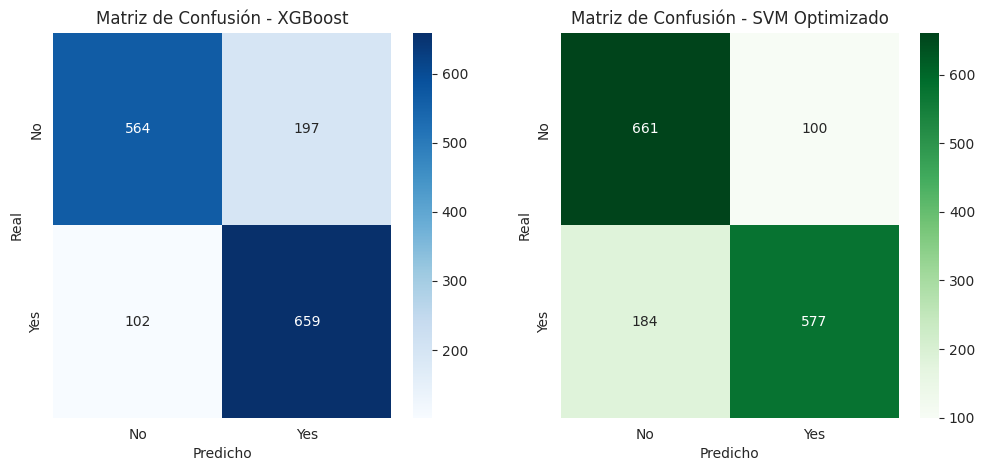

Modelos XGBoost y SVM optimizado comparados.


In [14]:
# CARGAMOS LIBRER√çAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEG√ìRICAS A NUM√âRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay m√°s variables categ√≥ricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Age']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACI√ìN DE VARIABLES DERIVADAS
df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction'])

# 4. SELECCI√ìN DE CARACTER√çSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=3)  # Reducimos la cantidad de folds para acelerar
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Caracter√≠sticas seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Hiperpar√°metros optimizados para SVM con una rejilla reducida
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1],
    'kernel': ['rbf']
}

# Grid Search para SVM con menos combinaciones
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Evaluamos los modelos
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

report_xgb = classification_report(y_test, y_pred_xgb)
report_svm = classification_report(y_test, y_pred_svm)

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("\nMatriz de Confusi√≥n - XGBoost:")
print(conf_matrix_xgb)
print("\nReporte de Clasificaci√≥n - XGBoost:")
print(report_xgb)

print(f"Accuracy del modelo SVM optimizado: {accuracy_svm:.2f}")
print("\nMatriz de Confusi√≥n - SVM:")
print(conf_matrix_svm)
print("\nReporte de Clasificaci√≥n - SVM:")
print(report_svm)

# Visualizaci√≥n de la matriz de confusi√≥n
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax[0])
ax[0].set_title("Matriz de Confusi√≥n - XGBoost")
ax[0].set_xlabel("Predicho")
ax[0].set_ylabel("Real")

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax[1])
ax[1].set_title("Matriz de Confusi√≥n - SVM Optimizado")
ax[1].set_xlabel("Predicho")
ax[1].set_ylabel("Real")

plt.show()

print("Modelos XGBoost y SVM optimizado comparados.")



<ipython-input-15-6723e18955f0>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Caracter√≠sticas seleccionadas: ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Age', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction']
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperpar√°metros para SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy del modelo SVM optimizado: 0.81

Matriz de Confusi√≥n - SVM:
[[661 100]
 [184 577]]

Reporte de Clasificaci√≥n - SVM:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       761
           1       0.85      0.76      0.80       761

    accuracy                           0.81      1522
   macro avg       0.82      0.81      0.81      1522
weighted avg       0.82      0.81      0.81      1522



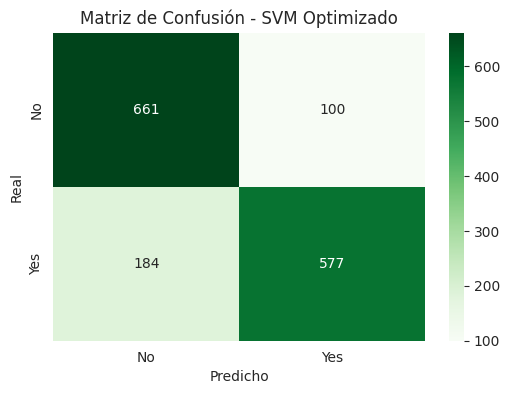

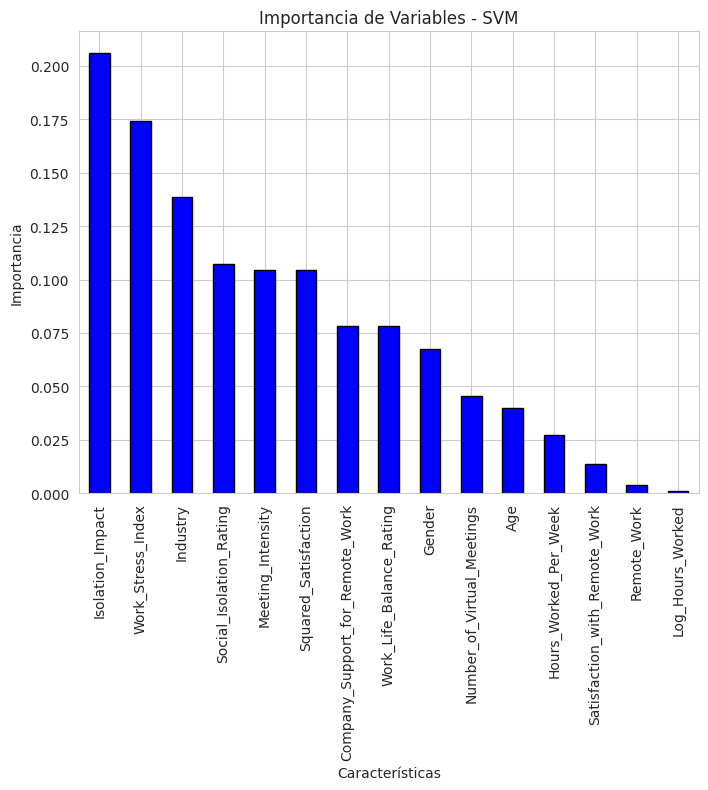

Modelo SVM optimizado evaluado con importancia de variables.


In [15]:
# CARGAMOS LIBRER√çAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEG√ìRICAS A NUM√âRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay m√°s variables categ√≥ricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Age']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACI√ìN DE VARIABLES DERIVADAS
df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction'])

# SELECCI√ìN DE CARACTER√çSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=3)  # Reducimos la cantidad de folds para acelerar
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Caracter√≠sticas seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Hiperpar√°metros optimizados para SVM con una rejilla reducida
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1],
    'kernel': ['rbf']
}

# Grid Search para SVM con m√°s opciones
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)

# Mostrar los mejores hiperpar√°metros encontrados
print("Mejores hiperpar√°metros para SVM:", svm_grid.best_params_)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Evaluamos el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy del modelo SVM optimizado: {accuracy_svm:.2f}")
print("\nMatriz de Confusi√≥n - SVM:")
print(conf_matrix_svm)
print("\nReporte de Clasificaci√≥n - SVM:")
print(report_svm)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - SVM Optimizado")
plt.show()

# Importancia de variables con Permutation Importance
perm_importance = permutation_importance(best_svm, X_test, y_test, scoring='accuracy')
feature_importance = pd.Series(perm_importance.importances_mean, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Importancia de Variables - SVM")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

print("Modelo SVM optimizado evaluado con importancia de variables.")

üìå Isolation_Impact
üîπ ¬øQu√© mide?

Se cre√≥ como una combinaci√≥n del nivel de aislamiento social y el equilibrio entre vida y trabajo.
üîπ ¬øPor qu√© es importante?
Un mayor impacto del aislamiento social combinado con una mala conciliaci√≥n puede generar m√°s estr√©s y problemas de salud mental.
Refleja el grado en el que el teletrabajo puede hacer que las personas se sientan desconectadas o sobrecargadas.
üìå Work_Stress_Index
üîπ ¬øQu√© mide?

La interacci√≥n entre las horas trabajadas y el equilibrio vida-trabajo.
üîπ ¬øPor qu√© es importante?
Un alto √≠ndice de estr√©s laboral indica que una persona trabaja muchas horas con poca capacidad de equilibrar su vida personal.
La fatiga y el agotamiento son factores clave en el desarrollo de problemas de salud mental.
üìå Industry
üîπ ¬øQu√© mide?

Representa el sector en el que trabaja la persona.
üîπ ¬øPor qu√© es importante?
No todas las industrias experimentan el teletrabajo de la misma manera.
Algunos sectores pueden ofrecer m√°s apoyo y flexibilidad que otros.
üìå Meeting_Intensity
üîπ ¬øQu√© mide?

La cantidad de reuniones virtuales en relaci√≥n con las horas trabajadas.
üîπ ¬øPor qu√© es importante?
Un alto n√∫mero de reuniones puede ser agotador y reducir la productividad.
Puede generar m√°s estr√©s y menos satisfacci√≥n con el trabajo remoto.
üìå Squared_Satisfaction
üîπ ¬øQu√© mide?

El impacto no lineal de la satisfacci√≥n con el teletrabajo.
üîπ ¬øPor qu√© es importante?
No todas las personas reaccionan igual al trabajo remoto.
La percepci√≥n de satisfacci√≥n influye en c√≥mo el teletrabajo afecta la salud mental.
üìå Social_Isolation_Rating
üîπ ¬øQu√© mide?

Nivel de aislamiento social percibido.
üîπ ¬øPor qu√© es importante?
Sentirse aislado es un factor clave en el deterioro de la salud mental.
Una red social s√≥lida puede mitigar los efectos negativos del teletrabajo.
üìå Company_Support_for_Remote_Work
üîπ ¬øQu√© mide?

Cu√°nto apoyo ofrece la empresa al teletrabajo.
üîπ ¬øPor qu√© es importante?
El respaldo de la empresa en t√©rminos de flexibilidad y herramientas puede marcar una gran diferencia en la experiencia del teletrabajo.
Puede amortiguar los efectos negativos del aislamiento o el estr√©s laboral.
üìå Work_Life_Balance_Rating
üîπ ¬øQu√© mide?

Nivel de satisfacci√≥n con la conciliaci√≥n entre trabajo y vida personal.
üîπ ¬øPor qu√© es importante?
Un bajo equilibrio entre la vida laboral y personal est√° directamente relacionado con el agotamiento y la ansiedad.

2Ô∏è‚É£ Explicaci√≥n General
üìå ¬øQu√© nos dice esto sobre el impacto del teletrabajo en la salud mental?
‚úîÔ∏è El aislamiento social es un factor clave, especialmente cuando no hay un buen equilibrio entre vida y trabajo.
‚úîÔ∏è El estr√©s laboral y las horas trabajadas juegan un papel importante, lo que sugiere que no es solo el teletrabajo en s√≠, sino c√≥mo se gestiona.
‚úîÔ∏è La industria y el apoyo de la empresa pueden modificar la experiencia del teletrabajo.
‚úîÔ∏è Las reuniones virtuales pueden ser una fuente de agotamiento, especialmente si se vuelven excesivas o poco productivas.
‚úîÔ∏è La percepci√≥n del teletrabajo var√≠a seg√∫n la persona, por lo que las pol√≠ticas laborales deben ser flexibles.

Conclusi√≥n
El modelo confirma que el impacto del teletrabajo en la salud mental no es uniforme. Depende de m√∫ltiples factores, como el estr√©s laboral, el aislamiento, el apoyo empresarial y la industria. Estos hallazgos pueden ayudar a dise√±ar pol√≠ticas laborales m√°s efectivas para minimizar los efectos negativos del teletrabajo en la salud mental. üöÄüìä

Caracter√≠sticas seleccionadas: ['Remote_Work', 'Number_of_Virtual_Meetings', 'Gender', 'Industry', 'Age', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity']
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperpar√°metros para SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy del modelo SVM optimizado: 0.82

Matriz de Confusi√≥n - SVM: [[614 147]
 [129 632]]

Reporte de Clasificaci√≥n - SVM:               precision    recall  f1-score   support

           0       0.83      0.81      0.82       761
           1       0.81      0.83      0.82       761

    accuracy                           0.82      1522
   macro avg       0.82      0.82      0.82      1522
weighted avg       0.82      0.82      0.82      1522



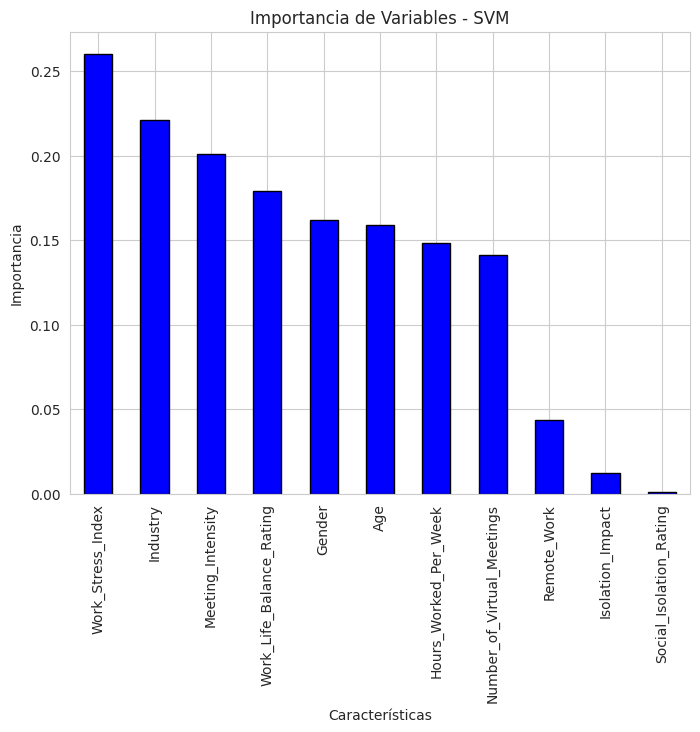

Modelo SVM optimizado evaluado con importancia de variables.
Predicci√≥n: S√≠ con una probabilidad de 0.76


In [16]:
# CARGAMOS LIBRER√çAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEG√ìRICAS A NUM√âRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Lista de variables iniciales
target_vars = ['Remote_Work', 'Number_of_Virtual_Meetings', 'Gender', 'Industry', 'Age', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACI√ìN DE VARIABLES DERIVADAS
def generar_variables_derivadas(datos):
    datos['Social_Isolation_Rating'] = datos['Number_of_Virtual_Meetings'] * 2 / 20  # Normalizaci√≥n b√°sica
    datos['Work_Stress_Index'] = datos['Hours_Worked_Per_Week'] * datos['Work_Life_Balance_Rating']
    datos['Isolation_Impact'] = datos['Social_Isolation_Rating'] * datos['Work_Life_Balance_Rating']
    datos['Meeting_Intensity'] = datos['Number_of_Virtual_Meetings'] / datos['Hours_Worked_Per_Week']
    datos['Log_Hours_Worked'] = np.log(datos['Hours_Worked_Per_Week'].clip(lower=1))
    return datos

df = generar_variables_derivadas(df)

# Aseguramos que 'Log_Hours_Worked' est√© presente en target_vars
target_vars.extend(['Social_Isolation_Rating', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked'])

# SELECCI√ìN DE CARACTER√çSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=3)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Caracter√≠sticas seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Hiperpar√°metros optimizados para SVM con una rejilla reducida
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)

print("Mejores hiperpar√°metros para SVM:", svm_grid.best_params_)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Guardamos el modelo entrenado
joblib.dump(best_svm, "svm_model.pkl")

# Evaluamos el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy del modelo SVM optimizado: {accuracy_svm:.2f}")
print("\nMatriz de Confusi√≥n - SVM:", confusion_matrix(y_test, y_pred_svm))
print("\nReporte de Clasificaci√≥n - SVM:", classification_report(y_test, y_pred_svm))

# Importancia de variables con Permutation Importance
perm_importance = permutation_importance(best_svm, X_test, y_test, scoring='accuracy')
feature_importance = pd.Series(perm_importance.importances_mean, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Importancia de Variables - SVM")
plt.ylabel("Importancia")
plt.xlabel("Caracter√≠sticas")
plt.show()

print("Modelo SVM optimizado evaluado con importancia de variables.")

# Funci√≥n para hacer predicciones con nuevos datos
def predecir_salud_mental(nuevos_datos):
    modelo = joblib.load("svm_model.pkl")
    nuevos_datos_df = pd.DataFrame([nuevos_datos], columns=target_vars)
    nuevos_datos_df = generar_variables_derivadas(nuevos_datos_df)
    nuevos_datos_df = nuevos_datos_df[selected_features]
    prediccion = modelo.predict(nuevos_datos_df)
    probabilidad = modelo.predict_proba(nuevos_datos_df)[:, 1]
    return "S√≠" if prediccion[0] == 1 else "No", probabilidad[0]

# Ejemplo de uso
nuevo_ejemplo = {
    'Remote_Work': 1,
    'Number_of_Virtual_Meetings': 5,
    'Gender': 1,
    'Industry': 2,
    'Age': 35,
    'Hours_Worked_Per_Week': 40,
    'Work_Life_Balance_Rating': 3
}

prediccion, probabilidad = predecir_salud_mental(nuevo_ejemplo)
print(f"Predicci√≥n: {prediccion} con una probabilidad de {probabilidad:.2f}")


In [17]:
# Diccionario de referencia para la leyenda
legend_info = {
    "Remote_Work": {1: "S√≠", 0: "No"},
    "Gender": {0: "Masculino", 1: "Femenino", 2: "No Binario"},
    "Industry": {0: "Tecnolog√≠a", 1: "Salud", 2: "Educaci√≥n", 3: "Finanzas", 4: "Retail", 5: "Manufactura", 6: "Otros"},
    "Work_Life_Balance_Rating": {1: "Muy malo", 2: "Malo", 3: "Neutral", 4: "Bueno", 5: "Excelente"}
}

# Aplicaci√≥n interactiva para ingresar datos
class InteractivePredictionApp:
    def __init__(self):
        self.inputs = {}
        self.index = -1
        self.variables = [
            ("Remote_Work", widgets.Dropdown(options=[(v, k) for k, v in legend_info["Remote_Work"].items()], description="Trabajo Remoto:")),
            ("Number_of_Virtual_Meetings", widgets.IntSlider(min=0, max=20, description="Reuniones Virtuales:")),
            ("Gender", widgets.Dropdown(options=[(v, k) for k, v in legend_info["Gender"].items()], description="G√©nero:")),
            ("Industry", widgets.Dropdown(options=[(v, k) for k, v in legend_info["Industry"].items()], description="Industria:")),
            ("Age", widgets.IntSlider(min=18, max=65, description="Edad:")),
            ("Hours_Worked_Per_Week", widgets.IntSlider(min=20, max=80, description="Horas/Semana:")),
            ("Work_Life_Balance_Rating", widgets.Dropdown(options=[(v, k) for k, v in legend_info["Work_Life_Balance_Rating"].items()], description="Balance Vida-Trabajo:"))
        ]
        self.output = widgets.Output()
        self.next_button = widgets.Button(description="Siguiente", button_style='info')
        self.next_button.on_click(self.next_variable)
        self.show_intro()

    def show_intro(self):
        clear_output()
        display(HTML("""
        <h3>Bienvenido a la Evaluaci√≥n del Impacto del Teletrabajo en la Salud Mental</h3>
        <p>Introduce los valores solicitados y el sistema calcular√° la probabilidad de que la persona pueda desarrollar problemas de salud mental en un entorno de trabajo 100% remoto.</p>
        <p>Si la probabilidad es mayor al 50%, se recomendar√° un modelo h√≠brido o presencial.</p>
        <h4>Valores esperados:</h4>
        <ul>
            <li><b>Trabajo Remoto:</b> 1 = S√≠, 0 = No</li>
            <li><b>G√©nero:</b> 0 = Masculino, 1 = Femenino, 2 = No Binario</li>
            <li><b>Industria:</b> 0 = Tecnolog√≠a, 1 = Salud, 2 = Educaci√≥n, 3 = Finanzas, 4 = Retail, 5 = Manufactura, 6 = Otros</li>
            <li><b>Reuniones Virtuales Semanales:</b> Entre 0 y 20</li>
            <li><b>Edad:</b> Entre 18 y 65 a√±os</li>
            <li><b>Horas Trabajadas por Semana:</b> Entre 20 y 80</li>
            <li><b>Balance Vida-Trabajo:</b> 1 = Muy malo, 2 = Malo, 3 = Neutral, 4 = Bueno, 5 = Excelente</li>
        </ul>
        """))
        start_button = widgets.Button(description="Comenzar", button_style='primary')
        start_button.on_click(self.start_survey)
        display(start_button)

    def start_survey(self, _):
        self.index = 0
        self.show_variable()

    def show_variable(self):
        clear_output()
        if self.index < len(self.variables):
            var_name, widget = self.variables[self.index]
            display(widget, self.next_button)
        else:
            self.predict()

    def next_variable(self, _):
        var_name, widget = self.variables[self.index]
        self.inputs[var_name] = widget.value
        self.index += 1
        self.show_variable()

    def predict(self):
        clear_output()
        display(HTML("<h4>Valores ingresados:</h4>"))
        for key, value in self.inputs.items():
            display(HTML(f"<p><b>{key}:</b> {value}</p>"))
        display(HTML("<h4>Calculando predicci√≥n...</h4>"))

        # Generar variables derivadas
        input_df = pd.DataFrame([self.inputs])
        input_df['Social_Isolation_Rating'] = input_df['Number_of_Virtual_Meetings'] * 2 / 20  # Normalizaci√≥n b√°sica
        input_df['Work_Stress_Index'] = input_df['Hours_Worked_Per_Week'] * input_df['Work_Life_Balance_Rating']
        input_df['Isolation_Impact'] = input_df['Social_Isolation_Rating'] * input_df['Work_Life_Balance_Rating']
        input_df['Meeting_Intensity'] = input_df['Number_of_Virtual_Meetings'] / input_df['Hours_Worked_Per_Week'].clip(lower=1)

        # Cargar el modelo y predecir
        modelo = joblib.load("svm_model.pkl")
        probabilidad = modelo.predict_proba(input_df)[:, 1][0]

        resultado = f"<h3>Probabilidad de impacto en la salud mental si trabaja 100% remoto: {probabilidad:.2f}</h3>"
        if probabilidad > 0.5:
            resultado += "<h3 style='color:red;'>Se recomienda un trabajo h√≠brido o presencial.</h3>"
        else:
            resultado += "<h3 style='color:green;'>El teletrabajo parece ser una opci√≥n viable.</h3>"

        display(HTML(resultado))

# Iniciar la aplicaci√≥n interactiva
app = InteractivePredictionApp()

Button(button_style='primary', description='Comenzar', style=ButtonStyle())